Train samples: 32064, Test samples (last month): 2977
Accuracy: 0.8414511252939201

Classification Report:
              precision    recall  f1-score   support

  Light_Load       0.96      0.93      0.95      1689
Maximum_Load       0.67      0.66      0.66       552
 Medium_Load       0.71      0.77      0.74       736

    accuracy                           0.84      2977
   macro avg       0.78      0.79      0.78      2977
weighted avg       0.85      0.84      0.84      2977



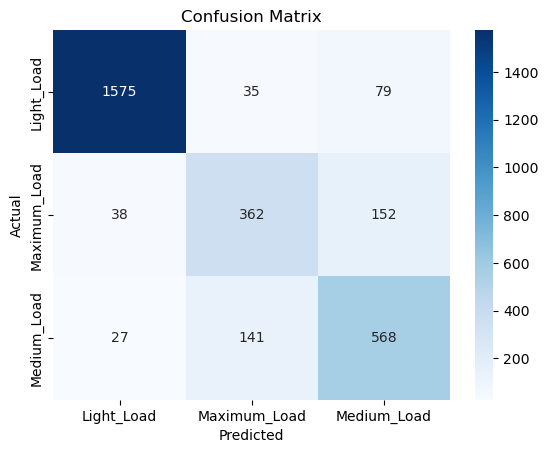

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('load_data.csv')
df.columns = df.columns.str.strip()  

df['Date_Time'] = pd.to_datetime(df['Date_Time'])

for col in [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'NSM'
]:
    df[col] = df[col].fillna(df[col].median())

le = LabelEncoder()
df['Load_Type_Encoded'] = le.fit_transform(df['Load_Type'])

df['Month'] = df['Date_Time'].dt.month

features = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'NSM',
    'Month'
]

X = df[features]
y = df['Load_Type_Encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

last_month = df['Date_Time'].dt.month.max()
test_mask = df['Date_Time'].dt.month == last_month
X_train, X_test = X_scaled[~test_mask], X_scaled[test_mask]
y_train, y_test = y[~test_mask], y[test_mask]

print(f"Train samples: {len(y_train)}, Test samples (last month): {len(y_test)}")

# Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()